In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from datetime import datetime

In [34]:
df=pd.read_csv(r'C:\Users\Saravanan\OneDrive\Desktop\DAP\statics\musicdata.csv')

In [35]:
df.head()

,Unnamed: 0,Track Name,Artists,Album Name,Album ID,Track ID,Popularity,Release Date,Duration (ms),Explicit,...,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
0,0,Bijlee Bijlee,Harrdy Sandhu,Bijlee Bijlee,3tG0IGB24sRhGFLs5F1Km8,1iZLpuGMr4tn1F5bZu32Kb,70,2021-10-30,168450,False,...,0.670,1,-5.313,0,0.1430,0.2690,0.000000,0.0733,0.643,100.004
1,1,Expert Jatt,Nawab,Expert Jatt,2gibg5SCTep0wsIMefGzkd,7rr6n1NFIcQXCsi43P0YNl,65,2018-01-18,199535,False,...,0.948,6,-2.816,0,0.1990,0.2980,0.000000,0.0784,0.647,172.038
2,2,"Kaun Nachdi (From ""Sonu Ke Titu Ki Sweety"")","Guru Randhawa, Neeti Mohan",High Rated Gabru - Guru Randhawa,6EDbwGsQNQRLf73c7QwZ2f,3s7m0jmCXGcM8tmlvjCvAa,64,2019-03-02,183373,False,...,0.830,4,-3.981,0,0.0455,0.0357,0.000000,0.0419,0.753,127.999
3,3,Na Na Na Na,J Star,Na Na Na Na,4xBqgoiRSOMU1VlKuntVQW,5GjxbFTZAMhrVfVrNrrwrG,52,2015,209730,False,...,0.863,3,-3.760,1,0.0413,0.3760,0.000014,0.0916,0.807,95.000
4,4,Patiala Peg,Diljit Dosanjh,Do Gabru - Diljit Dosanjh & Akhil,1uxDllRe9CPhdr8rhz2QCZ,6TikcWOLRsPq66GBx2jk67,46,2018-07-10,188314,False,...,0.811,5,-3.253,0,0.1840,0.0259,0.000000,0.3110,0.835,175.910


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        100 non-null    int64  
 1   Track Name        94 non-null     object 
 2   Artists           94 non-null     object 
 3   Album Name        94 non-null     object 
 4   Album ID          100 non-null    object 
 5   Track ID          100 non-null    object 
 6   Popularity        100 non-null    int64  
 7   Release Date      100 non-null    object 
 8   Duration (ms)     100 non-null    int64  
 9   Explicit          100 non-null    bool   
 10  External URLs     100 non-null    object 
 11  Danceability      100 non-null    float64
 12  Energy            100 non-null    float64
 13  Key               100 non-null    int64  
 14  Loudness          100 non-null    float64
 15  Mode              100 non-null    int64  
 16  Speechiness       100 non-null    float64
 17

In [37]:
df.isnull().sum()

Unnamed: 0          0
Track Name          6
Artists             6
Album Name          6
Album ID            0
Track ID            0
Popularity          0
Release Date        0
Duration (ms)       0
Explicit            0
External URLs       0
Danceability        0
Energy              0
Key                 0
Loudness            0
Mode                0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
dtype: int64

In [38]:
df.duplicated().sum()

np.int64(0)

Data Cleaning

In [41]:
df = df.drop(columns=['Unnamed: 0'])


In [42]:
df['Track Name'].fillna('Unknown', inplace=True)
df['Artists'].fillna('Unknown', inplace=True)
df['Album Name'].fillna('Unknown', inplace=True)

C:\Users\Saravanan\AppData\Local\Temp\ipykernel_11368\3153436369.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Track Name'].fillna('Unknown', inplace=True)
C:\Users\Saravanan\AppData\Local\Temp\ipykernel_11368\3153436369.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


EDA

Distribution of the Popularity score

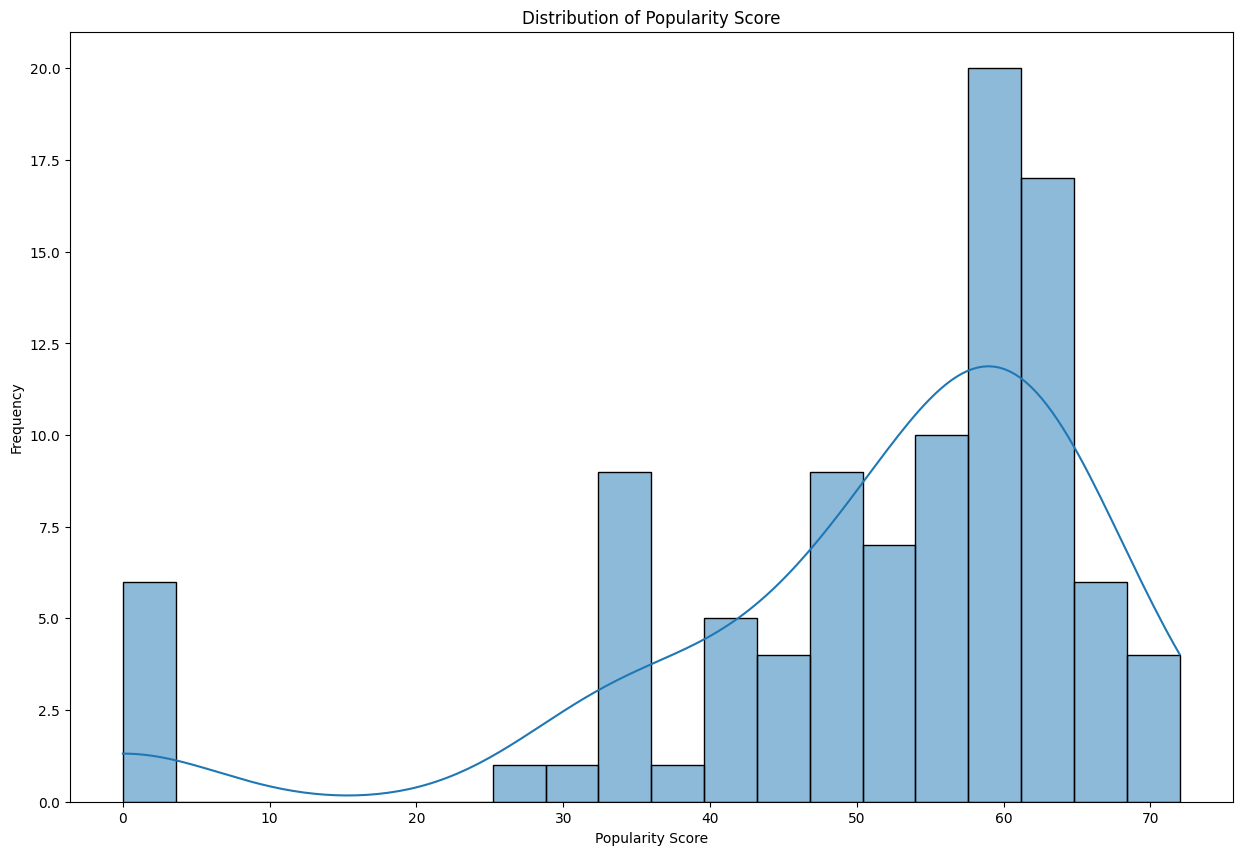

In [43]:
plt.figure(figsize=(15,10))
sns.histplot(df['Popularity'],bins=20,kde=True)
plt.title('Distribution of Popularity Score')
plt.xlabel('Popularity Score')
plt.ylabel('Frequency')
plt.show()

correlations between Popularity and other musical features

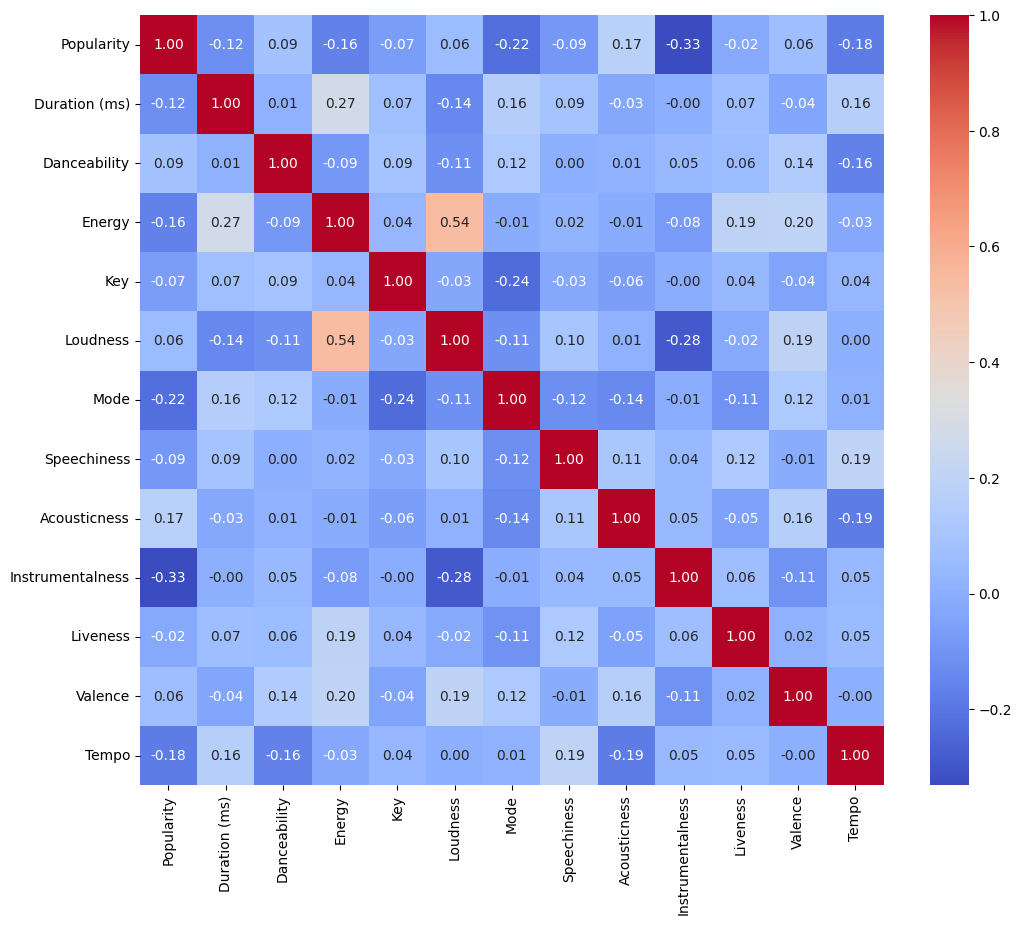

In [44]:
plt.figure(figsize=(12,10))
correlation_matrix=df.select_dtypes(include=['float64','int64']).corr()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.show()

Relationship with Popularity

In [52]:
feature=['Danceability','Energy', 'Loudness', 'Acousticness', 'Valence']


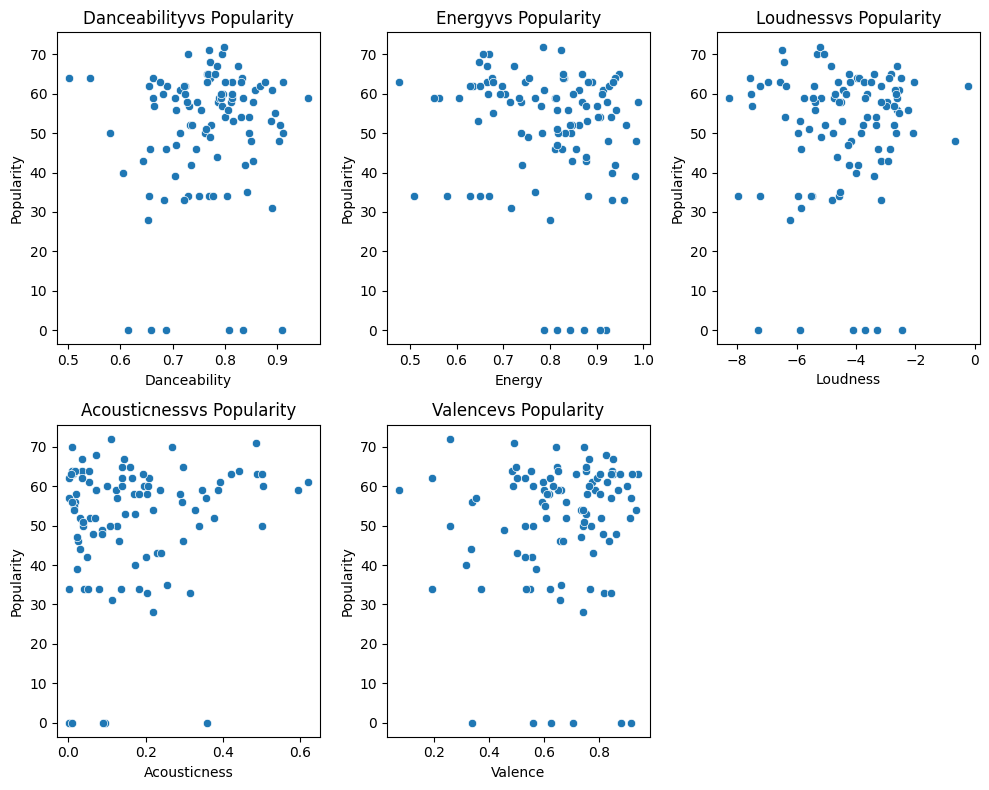

In [53]:
plt.figure(figsize=(10,8))

for i,feature in enumerate(feature,1):
    plt.subplot(2,3,i)
    sns.scatterplot(x=df[feature],y=df['Popularity'])
    plt.title(f'{feature}vs Popularity')
    plt.xlabel(feature)
    plt.ylabel('Popularity')

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Popularity')

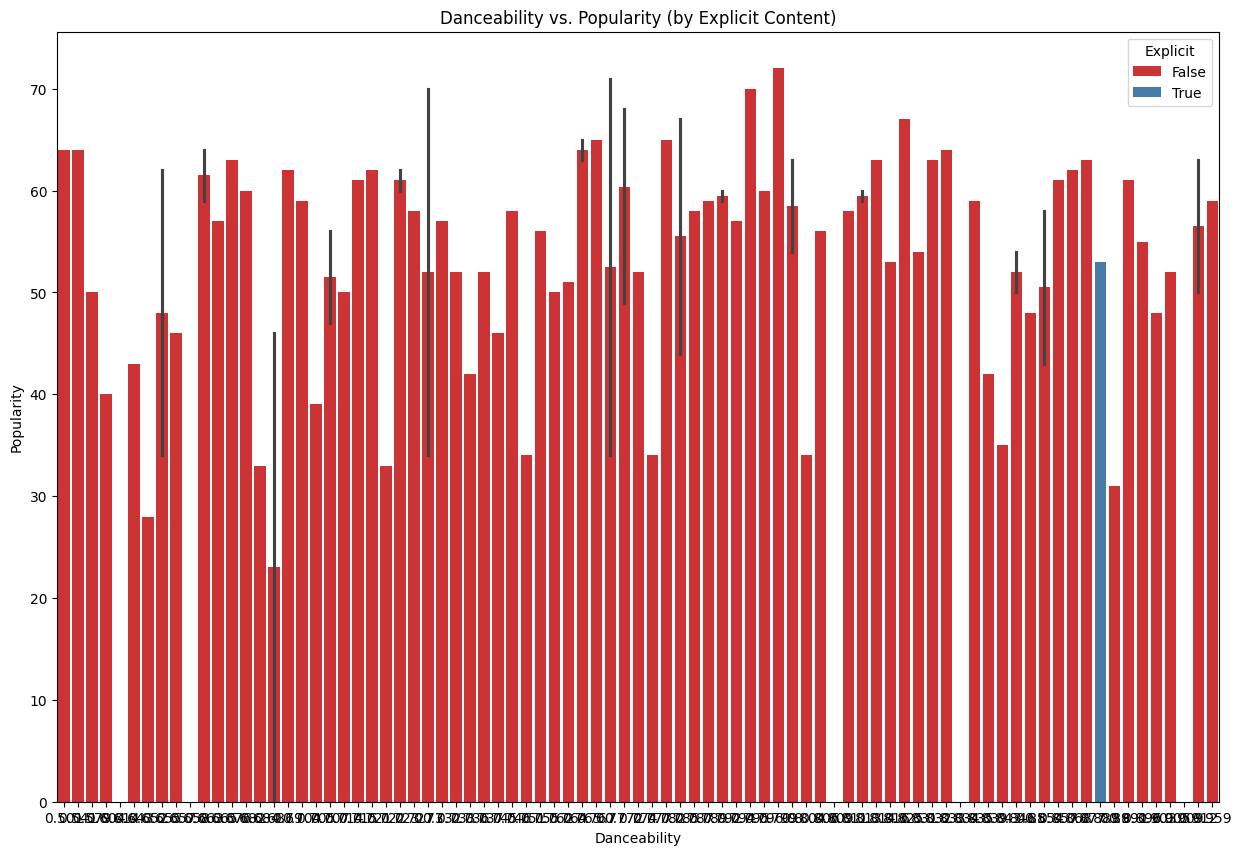

In [56]:
plt.figure(figsize=(15,10))
sns.barplot(x='Danceability', y='Popularity', hue='Explicit', data=df, palette='Set1')
plt.title('Danceability vs. Popularity (by Explicit Content)')
plt.xlabel('Danceability')
plt.ylabel('Popularity')

Text(0, 0.5, 'Popularity')

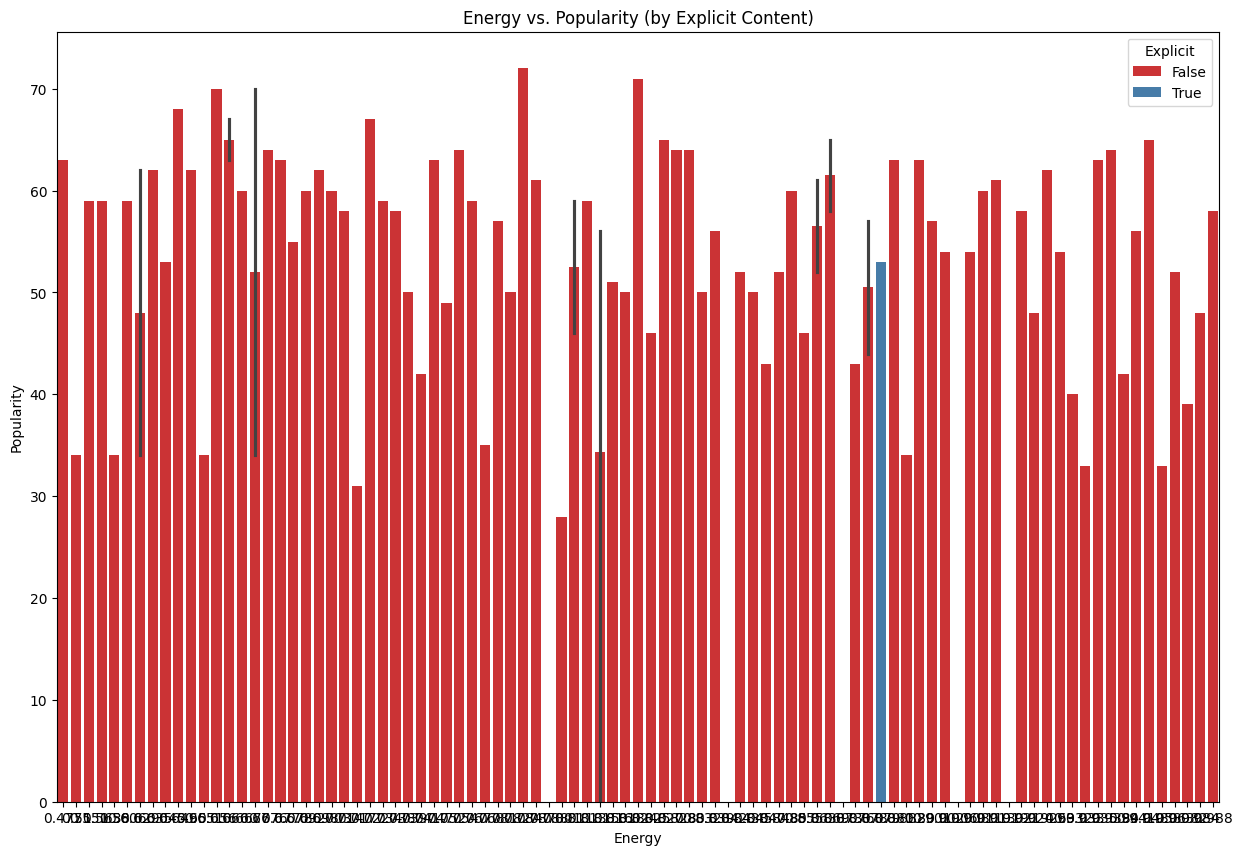

In [57]:
plt.figure(figsize=(15,10))
sns.barplot(x='Energy', y='Popularity', hue='Explicit', data=df, palette='Set1')
plt.title('Energy vs. Popularity (by Explicit Content)')
plt.xlabel('Energy')
plt.ylabel('Popularity')

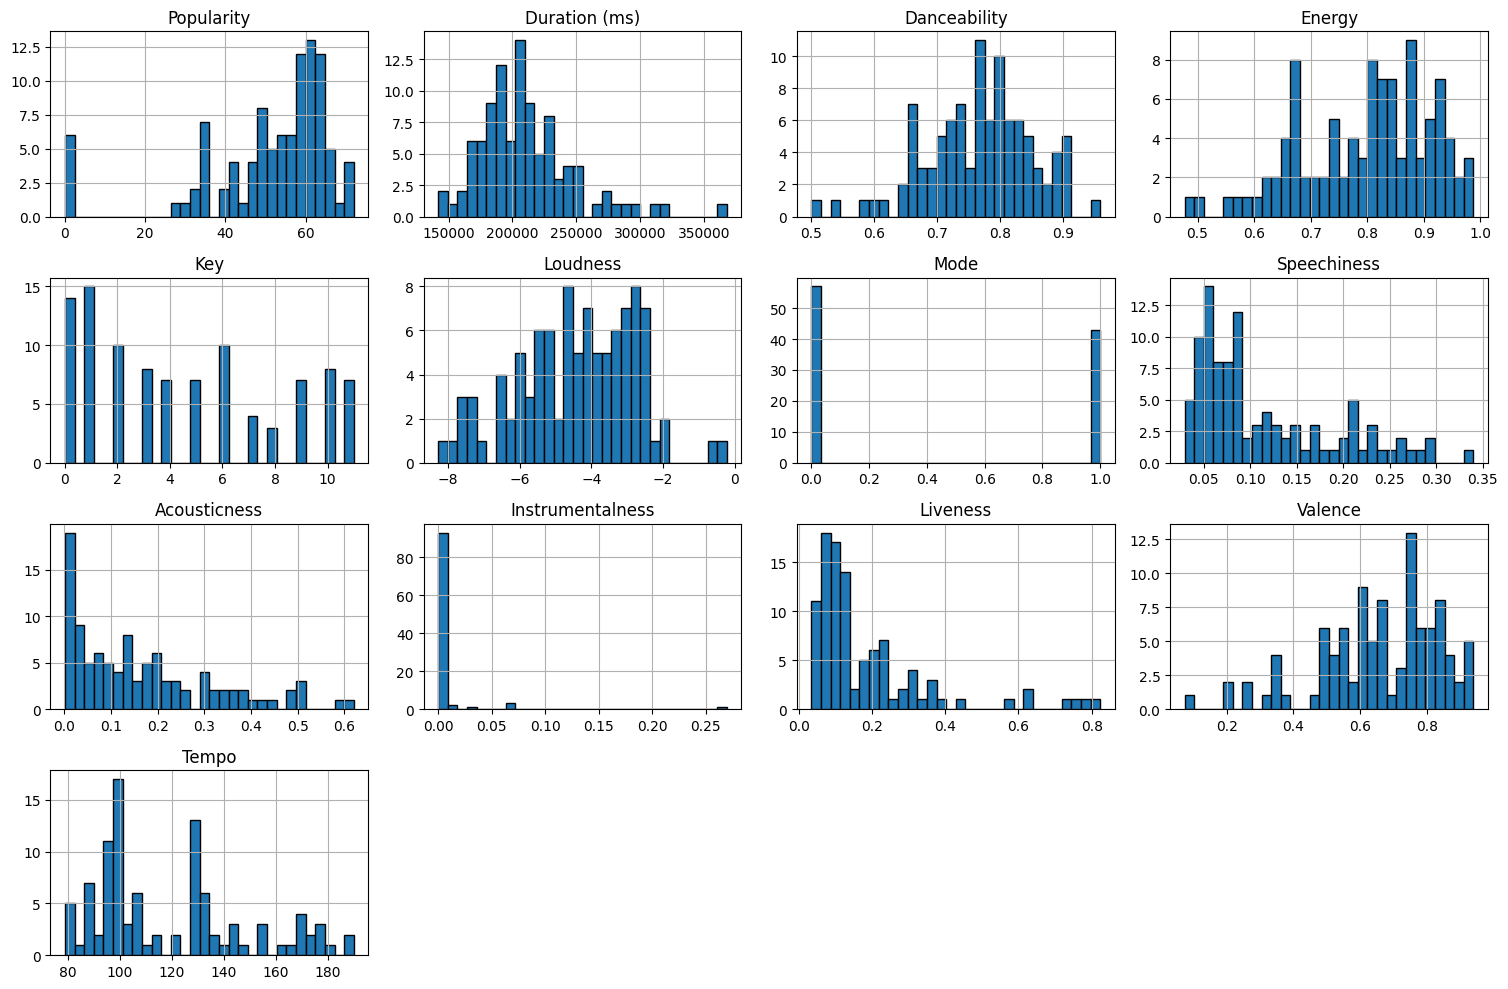

In [59]:
# Histograms for all numerical columns
df.hist(figsize=(15, 10), bins=30, edgecolor='black')
plt.tight_layout()
plt.show()


Count Plots for Categorical Features

C:\Users\Saravanan\AppData\Local\Temp\ipykernel_11368\2293881300.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists, y=top_artists.index,palette='Set2')


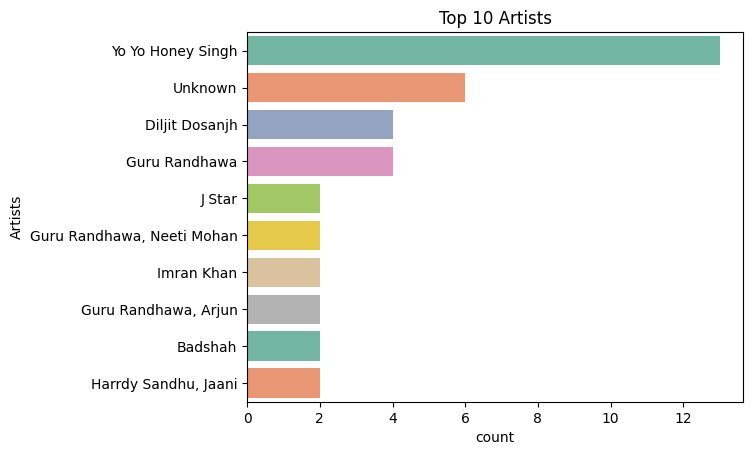

In [67]:

top_artists = df['Artists'].value_counts().head(10)
sns.barplot(x=top_artists, y=top_artists.index,palette='Set2')
plt.title('Top 10 Artists')
plt.show()


Box Plots for Outliers

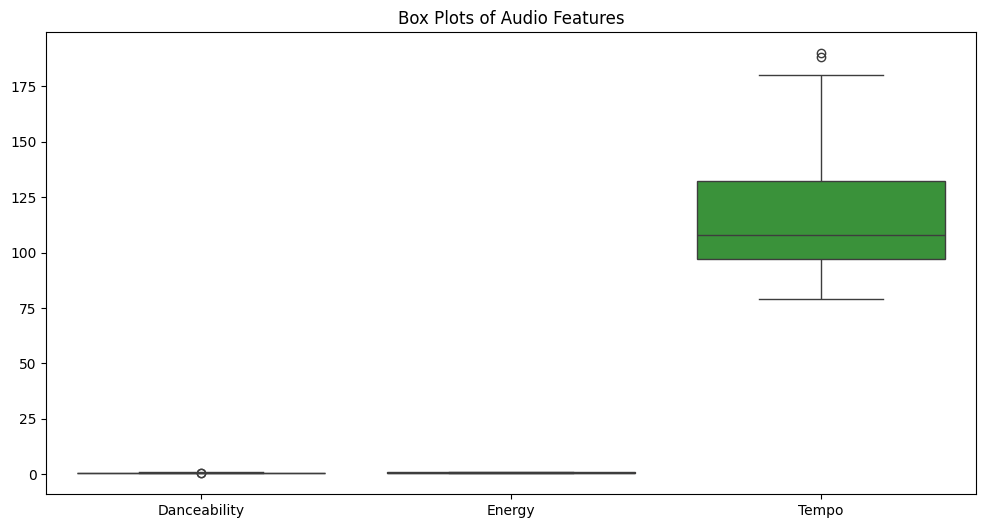

In [64]:
# Box plots for selected columns
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Danceability', 'Energy', 'Tempo']])
plt.title('Box Plots of Audio Features')
plt.show()


In [65]:
# Calculate IQR for Tempo to detect outliers
Q1 = df['Tempo'].quantile(0.25)
Q3 = df['Tempo'].quantile(0.75)
IQR = Q3 - Q1

# Detect outliers using IQR method
outliers = df[(df['Tempo'] < (Q1 - 1.5 * IQR)) | (df['Tempo'] > (Q3 + 1.5 * IQR))]
print(f'Number of outliers in Tempo: {len(outliers)}')


Number of outliers in Tempo: 2


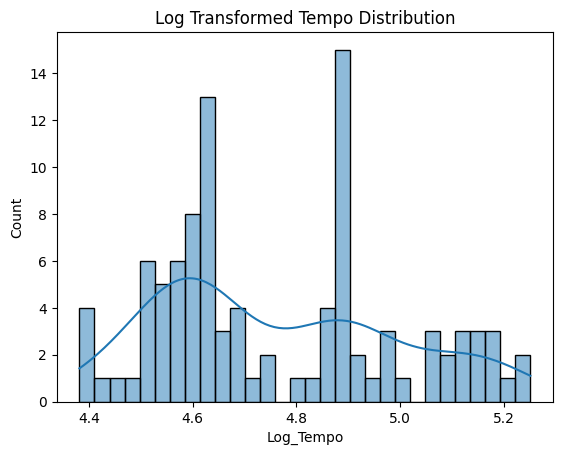

In [66]:
import numpy as np

# Log transformation on a skewed feature
df['Log_Tempo'] = np.log(df['Tempo'] + 1)

# Plot transformed feature
sns.histplot(df['Log_Tempo'], bins=30, kde=True)
plt.title('Log Transformed Tempo Distribution')
plt.show()
